In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

#Load  IPL URL

In [49]:
url="https://www.iplt20.com/auction/2022"
url

'https://www.iplt20.com/auction/2022'

In [50]:
#use requests to read url check response
page=requests.get(url)
page

<Response [200]>

In [51]:
soup=BeautifulSoup(page.text,"lxml")

In [52]:
#it show all html code of ipl website shown below
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title data-page-title="IPL Auction" id="page_title">IPL Auction</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, user-scalable=no" name="viewport"/>
<meta content="lfIlCVOpbvSXKv9L9vaiPgAMzWreEfOZEjc8h1eS" name="csrf-token"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<link href="https://www.iplt20.com/auction/2022" rel="canonical"/>
<meta content="#19398a" name="theme-color"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="website" name="og:type"/>
<meta content="IPL Auction" name="twitter:title"/>
<meta content="https://www.iplt20.com/auction/2022" name="og:url"/>
<meta content="IPL Auction" name="og:title"/>
<meta content="It's Auction Time! Get all information about the auction as it happened. Details about Highest Bid for players, most expensive players, players retained, Teams &amp; their formation

In [53]:
table=soup.find("table",class_="ih-td-tab auction-tbl")

In [54]:
table

<table class="ih-td-tab auction-tbl" width="100%">
<tr class="ih-pt-tbl" style="display:revert">
<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>
<th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>
<th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>
<th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>
</tr>
<tbody id="pointsdata">
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://documents.iplt20.com/ipl/franchises/1644311961_CSKroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Chennai Super Kings</h2>
</div>
</td>
<td>₹2,95,00,000</td>
<td>8</td>
<td>25</td>
</tr>
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://documents.iplt20.com/ipl/franchises/1644312373_DCroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Delhi Capitals</h2>
</div>
</td>
<td>₹10,00,000</td>
<td>7</td>
<td>24</td>
</tr>
<tr>
<t

In [55]:
#to get header
title=table.find_all("th")
title

[<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>,
 <th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>,
 <th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>,
 <th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>]

In [56]:
#to get all header save in df
header=[]
for i in title:
    name=i.text
    header.append(name)
print(header)

['TEAM', 'FUNDS REMAINING', 'OVERSEAS PLAYERS ', 'TOTAL PLAYERS']


In [57]:
#create dataframe add these header
df=pd.DataFrame(columns=header)
df

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS


In [58]:
#extract all row for header
rows=table.find_all("tr")
rows

[<tr class="ih-pt-tbl" style="display:revert">
 <th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>
 <th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>
 <th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>
 <th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>
 </tr>,
 <tr>
 <td class="ih-t-color">
 <div class="ih-pt-ic">
 <div class="ih-pt-img" style="width: 60px">
 <img alt="" src="https://documents.iplt20.com/ipl/franchises/1644311961_CSKroundbig.png"/>
 </div>
 <h2 class="ih-pt-cont">Chennai Super Kings</h2>
 </div>
 </td>
 <td>₹2,95,00,000</td>
 <td>8</td>
 <td>25</td>
 </tr>,
 <tr>
 <td class="ih-t-color">
 <div class="ih-pt-ic">
 <div class="ih-pt-img" style="width: 60px">
 <img alt="" src="https://documents.iplt20.com/ipl/franchises/1644312373_DCroundbig.png"/>
 </div>
 <h2 class="ih-pt-cont">Delhi Capitals</h2>
 </div>
 </td>
 <td>₹10,00,000</td>
 <td>7</td>
 <td>24</td>
 </tr>,
 <tr>
 <td class="ih-t-color">
 <div class="ih-

In [59]:
#take data under the header header index [0] row index [1:] 1 and onward
for i in rows[1:]:
    first_td=i.find_all("td")[0].find("div",class_="ih-pt-ic").text.strip()
    data=i.find_all("td")[1:]
    #print(data)
    row=[tr.text for tr in data]
    #print[row]
    row.insert(0,first_td)
    #print(row)
    l=len(df)
    df.loc[l]=row
    #print(df)
print(df.head())

                    TEAM FUNDS REMAINING OVERSEAS PLAYERS  TOTAL PLAYERS
0    Chennai Super Kings    ₹2,95,00,000                 8            25
1         Delhi Capitals      ₹10,00,000                 7            24
2         Gujarat Titans      ₹15,00,000                 8            23
3  Kolkata Knight Riders      ₹45,00,000                 8            25
4   Lucknow Super Giants              ₹0                 7            21


In [60]:
df

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,"₹2,95,00,000",8,25
1,Delhi Capitals,"₹10,00,000",7,24
2,Gujarat Titans,"₹15,00,000",8,23
3,Kolkata Knight Riders,"₹45,00,000",8,25
4,Lucknow Super Giants,₹0,7,21
5,Mumbai Indians,"₹10,00,000",8,25
6,Punjab Kings,"₹3,45,00,000",7,25
7,Rajasthan Royals,"₹95,00,000",8,24
8,Royal Challengers Bangalore,"₹1,55,00,000",8,22
9,Sunrisers Hyderabad,"₹10,00,000",8,23


#Save the dataFrame in CSV files

In [61]:
#save df in CSV
df.to_csv('IPL_Auction_2022.csv')

In [63]:
#read the dataset
df1=pd.read_csv('/content/IPL_Auction_2022.csv')
df1

,Unnamed: 0,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,0,Chennai Super Kings,"₹2,95,00,000",8,25
1,1,Delhi Capitals,"₹10,00,000",7,24
2,2,Gujarat Titans,"₹15,00,000",8,23
3,3,Kolkata Knight Riders,"₹45,00,000",8,25
4,4,Lucknow Super Giants,₹0,7,21
5,5,Mumbai Indians,"₹10,00,000",8,25
6,6,Punjab Kings,"₹3,45,00,000",7,25
7,7,Rajasthan Royals,"₹95,00,000",8,24
8,8,Royal Challengers Bangalore,"₹1,55,00,000",8,22
9,9,Sunrisers Hyderabad,"₹10,00,000",8,23


In [65]:
df1.columns

Index(['Unnamed: 0', 'TEAM', 'FUNDS REMAINING', 'OVERSEAS PLAYERS ',
       'TOTAL PLAYERS'],
      dtype='object')

In [66]:
#drop unanmed column
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,"₹2,95,00,000",8,25
1,Delhi Capitals,"₹10,00,000",7,24
2,Gujarat Titans,"₹15,00,000",8,23
3,Kolkata Knight Riders,"₹45,00,000",8,25
4,Lucknow Super Giants,₹0,7,21
5,Mumbai Indians,"₹10,00,000",8,25
6,Punjab Kings,"₹3,45,00,000",7,25
7,Rajasthan Royals,"₹95,00,000",8,24
8,Royal Challengers Bangalore,"₹1,55,00,000",8,22
9,Sunrisers Hyderabad,"₹10,00,000",8,23


In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TEAM               10 non-null     object
 1   FUNDS REMAINING    10 non-null     object
 2   OVERSEAS PLAYERS   10 non-null     int64 
 3   TOTAL PLAYERS      10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [84]:
# Remove the currency symbol and commas, then convert to integer
df1['FUNDS REMAINING'] = df1['FUNDS REMAINING'].replace('[₹,]', '', regex=True).astype(int)

# Check the data type to confirm the conversion
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TEAM               10 non-null     object
 1   FUNDS REMAINING    10 non-null     int64 
 2   OVERSEAS PLAYERS   10 non-null     int64 
 3   TOTAL PLAYERS      10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [87]:
df1

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,29500000,8,25
1,Delhi Capitals,1000000,7,24
2,Gujarat Titans,1500000,8,23
3,Kolkata Knight Riders,4500000,8,25
4,Lucknow Super Giants,0,7,21
5,Mumbai Indians,1000000,8,25
6,Punjab Kings,34500000,7,25
7,Rajasthan Royals,9500000,8,24
8,Royal Challengers Bangalore,15500000,8,22
9,Sunrisers Hyderabad,1000000,8,23


#NOw we can perform all type of data analysis task

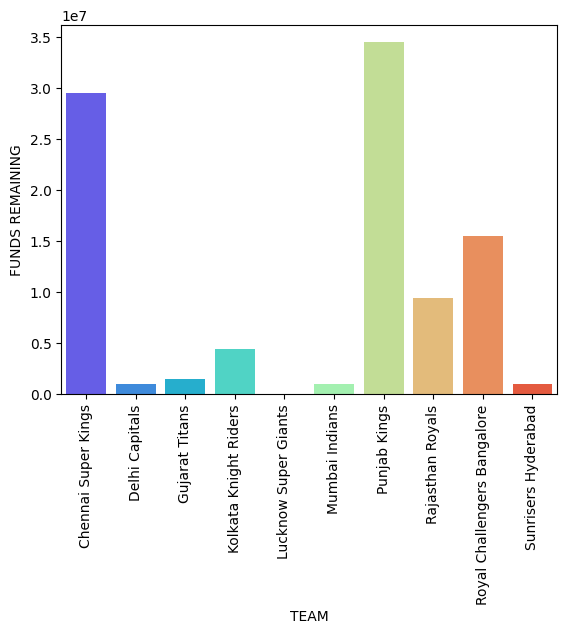

In [86]:
#plot name and fundremaing column in bar chart
sns.barplot(hue='TEAM',x='TEAM',y='FUNDS REMAINING',data=df1,palette="rainbow")
plt.xticks(rotation=90)
plt.show()